### Summary :
This notebook explores a Logistic Regression and Decision Tree base models, as well as with various SMOTE variations, and Decision Tree and Random Forest models with hyperparameter tuning and PCA, to predict `Mushrooms` usage. The performance of these models is evaluated using confusion matrices and classification reports.

# INDEX
- [Logistic Regression](#logreg)
- [Coefficient analysis](#Coef)
- [Logistic Regression with SMOTE variations and Confusion Matrix](#logreg_smote)
- [Logistic Regression with BorderlineSMOTE](#logreg_ADA)
- [Decision Tree](#DT)
- [Decision Tree and Random Forest with PCA](#DTRM)
- [Models Comparison](#Models)
<a id='INDEX'></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency,ttest_ind
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('drug_consumption_model_ready.csv')

I am trying to predict the likelihood of `Mushrooms` use based on patterns of other drug usage. Going to try Logistic Regression, Decision Tree and Random Forest with PCA and pipeline.

In [3]:
# Split the data into train and test with 75% volume in training dataset and 25% in testing dataset

X = df.drop(['Mushrooms','Unnamed: 0'],axis=1)
y = df['Mushrooms']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


### Logistic Regression <a id='logreg'></a>

In [4]:
from sklearn.linear_model import LogisticRegression

# Instantiate logistic regression models
logreg = LogisticRegression()

# Fit models separately on positive and negative reviews
logreg.fit(X_train, y_train)


# Print train and test scores for both models
print((f"Train score: {logreg.score(X_train, y_train)}")) 
print(f"Test score: {logreg.score(X_test, y_test)}")

Train score: 0.9163688348820586
Test score: 0.9293361884368309


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Coefficient analysis <a id='Coef'></a>

In [5]:
#The intercept
intercept = np.exp(logreg.intercept_)

#The coefficients return an array with one entry for each feature. 
#Since this is logistic regression, the coefficients can be interpreted by exponentiating them
coefficient = np.exp(logreg.coef_[0])


print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficient}')

Intercept: [0.59081859]
Coefficients: [0.95480393 0.95264163 1.04328999 0.99649878 0.98100623 1.11459213
 1.28125526 1.33913208 1.09193355 1.20968787 1.25370224 0.81006249
 2.97164509 0.75038356 1.4962346  0.73291955 1.07947895 0.98991014
 2.12914155 1.58901089 4.57073917 0.81051357 0.75488686 0.96791481
 0.7861622  0.73199152 0.85037091 0.72137215 1.06206141 0.75537311
 1.09260361 1.14862174 0.94624407 0.65760404 1.42669431 0.96539641
 1.05213544 0.81182168 1.25067194 0.84628058 0.7656107  0.89932438
 1.38864578 1.34094366 0.94861268 0.98781315 0.90410462 0.30428757
 1.29671879]


<Figure size 640x480 with 0 Axes>

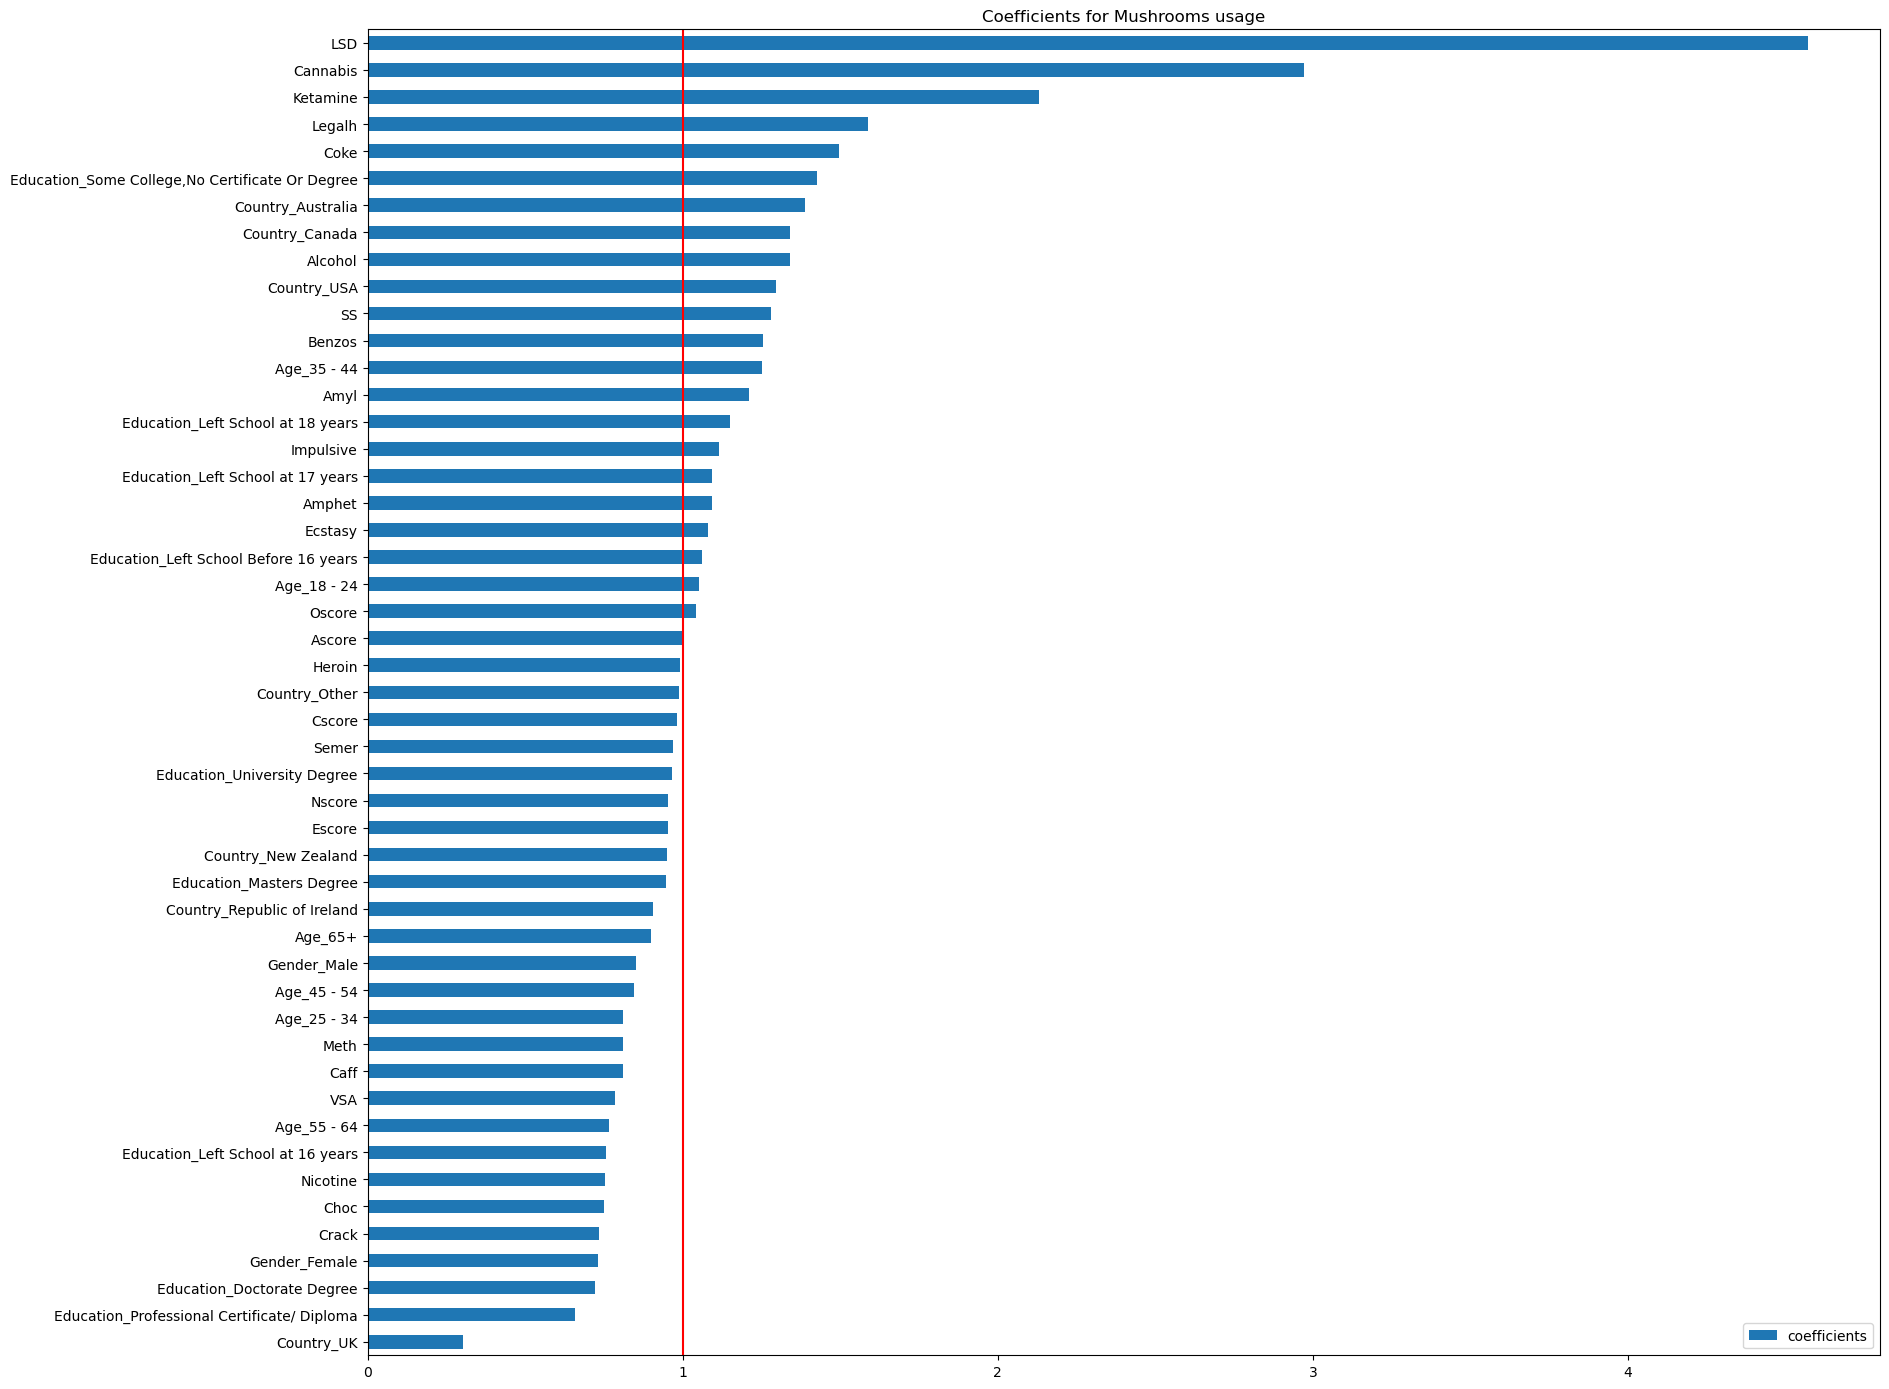

In [6]:
plt.figure()

#Creating a data frame with sorting by 'coefficients'
df1 = pd.DataFrame(
    data={"coefficients": coefficient},
    index=X_train.columns
).sort_values(by="coefficients")

#Plotting the horizontal bar graph
df1.plot(kind="barh", figsize=(19, 14), title="Coefficients for Mushrooms usage")
plt.axvline(1, c='r')
plt.tight_layout()
plt.show()



In [15]:
df1

,coefficients
Country_UK,0.304288
Education_Professional Certificate/ Diploma,0.657604
Education_Doctorate Degree,0.721372
Gender_Female,0.731992
Crack,0.732920
Choc,0.750384
Nicotine,0.754887
Education_Left School at 16 years,0.755373
Age_55 - 64,0.765611
VSA,0.786162


Based on the coefficients from the logistic regression model, the top contributors to predicting outcomes include substance uses such as LSD (coefficient: 4.57), Cannabis (coefficient: 2.97), Ketamine (coefficient: 2.13), Legalh (coefficient: 1.59), and Coke (coefficient: 1.50). These substances have the most substantial impact on the model's predictions.

Additionally, demographic and personality traits also play significant roles. Age_18-24 (coefficient: 1.05) and Country_Republic of Ireland (coefficient: 0.90) are influential demographic factors. Personality traits such as Oscore (coefficient: 1.04), Ascore (coefficient: 1.00), Nscore (coefficient: 0.95), Escore (coefficient: 0.95), and Cscore (coefficient: 0.98) also contribute significantly to the model's predictive power. These findings underscore the complex interplay between substance use, demographics, and personality traits in predicting behavioral outcomes.

### Logistic Regression Confusion Matrix <a id='logconf'></a>

array([[421,   8],
       [ 25,  13]])

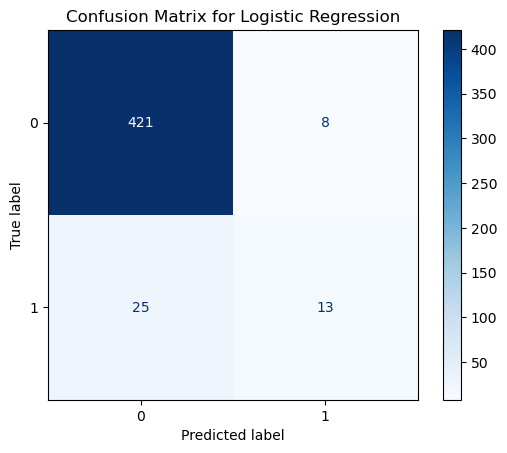

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       429
           1       0.62      0.34      0.44        38

    accuracy                           0.93       467
   macro avg       0.78      0.66      0.70       467
weighted avg       0.92      0.93      0.92       467



In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class predictions
y_pred = logreg.predict(X_test)

# Generate confusion matrix
logreg_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
logreg_df = pd.DataFrame(
    logreg_matrix,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)


display(logreg_matrix)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

#### Summary
The Logistic Regression model achieved a moderate test accuracy of 93%, with strong precision (94%) for the majority class (0) but lower recall (34%) and precision (62%) for the minority class (1). The model shows potential for further improvement in handling the minority class through recalibration or sampling techniques to enhance overall classification performance.

### Logistic Regression with SMOTE variations <a id='logreg_smote'></a>

Results for BorderlineSMOTE:
Best parameters for Logistic Regression:  {'model__C': 0.1}
Best cross-validation score for Logistic Regression: 0.82
Test set score for Logistic Regression: 0.81

Confusion Matrix:
 [[351  78]
 [  9  29]]



Confusion Report:
               precision    recall  f1-score   support

           0       0.97      0.82      0.89       429
           1       0.27      0.76      0.40        38

    accuracy                           0.81       467
   macro avg       0.62      0.79      0.64       467
weighted avg       0.92      0.81      0.85       467



Results for SMOTEN:
Best parameters for Logistic Regression:  {'model__C': 1}
Best cross-validation score for Logistic Regression: 0.88
Test set score for Logistic Regression: 0.87

Confusion Matrix:
 [[388  41]
 [ 21  17]]



Confusion Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93       429
           1       0.29      0.45      0.35        38

    

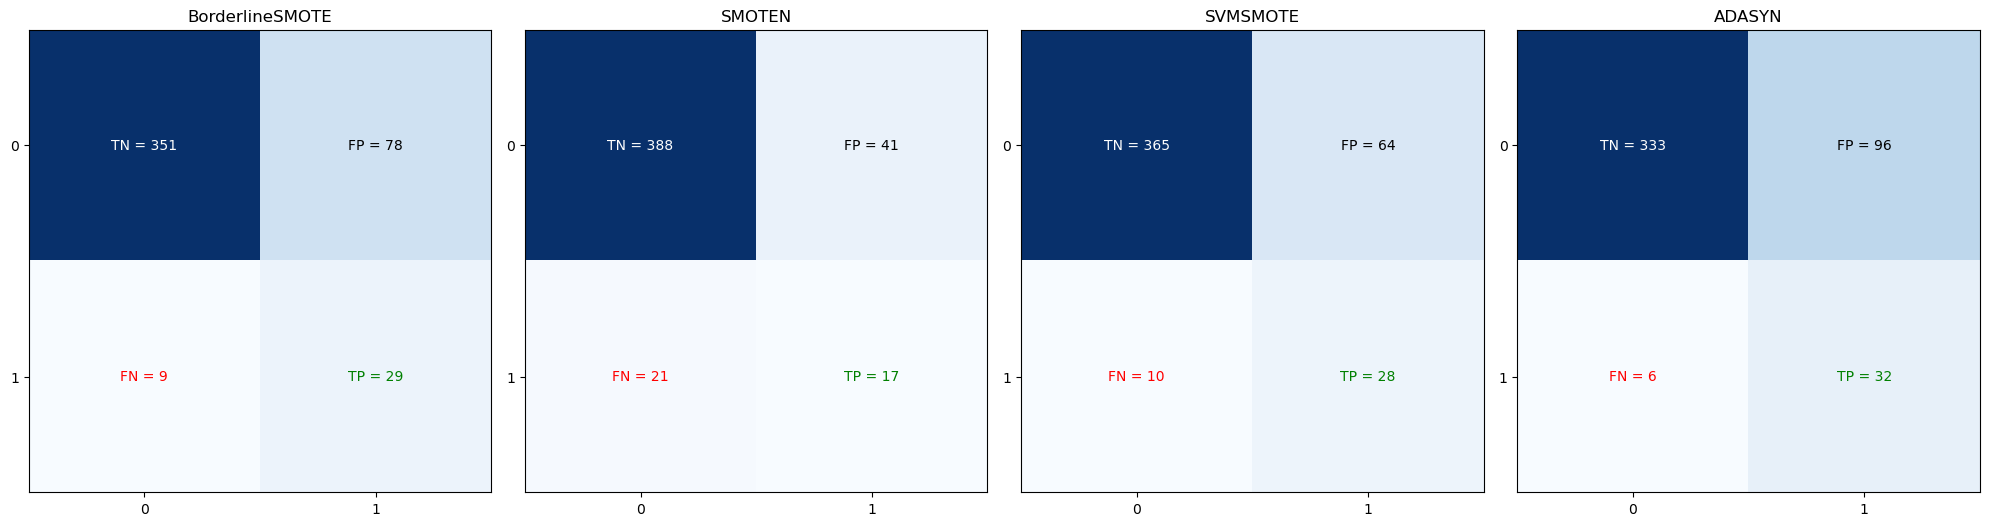

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import BorderlineSMOTE, SMOTEN, SVMSMOTE, KMeansSMOTE, ADASYN
import matplotlib.pyplot as plt

# List of SMOTE variations
smote_variations = [
    ('BorderlineSMOTE', BorderlineSMOTE(random_state=42, sampling_strategy='minority')),
    ('SMOTEN', SMOTEN(random_state=42, sampling_strategy='minority')),
    ('SVMSMOTE', SVMSMOTE(random_state=42, sampling_strategy='minority')),
    ('ADASYN', ADASYN(random_state=42, sampling_strategy='minority'))
]

# Define the parameter grid for GridSearchCV for Logistic Regression
log_param_grid = {
    'model__C': [0.1, 1, 10, 50, 100]
}

# Prepare subplots
fig, axes = plt.subplots(1, len(smote_variations), figsize=(20, 5))

# Loop through each SMOTE variation
for ax, (name, smote) in zip(axes, smote_variations):
    # Define the estimators for the Logistic Regression pipeline
    log_estimators = [
        ('normalize', StandardScaler()),  # Normalize the data
        ('minority', smote),  # Handle imbalanced data with selected SMOTE variation
        ('model', LogisticRegression(max_iter=1000))  # Logistic Regression model
    ]

    # Create the pipeline using imblearn's Pipeline
    log_pipe = ImbPipeline(log_estimators)

    # Create the GridSearchCV object
    log_grid = GridSearchCV(log_pipe, log_param_grid, cv=5)

    # Fit the grid search to the training data (ensure X_train and y_train are defined)
    log_fittedgrid = log_grid.fit(X_train, y_train)

    # Evaluate the best model on the test data (ensure X_test and y_test are defined)
    log_score = log_fittedgrid.score(X_test, y_test)

    # Make predictions using the best model
    y_pred = log_fittedgrid.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    report_initial = classification_report(y_test, y_pred)

    # Print the best parameters and score for Logistic Regression
    print(f"Results for {name}:")
    print("Best parameters for Logistic Regression: ", log_fittedgrid.best_params_)
    print("Best cross-validation score for Logistic Regression: {:.2f}".format(log_fittedgrid.best_score_))
    print("Test set score for Logistic Regression: {:.2f}".format(log_score))
    print("\nConfusion Matrix:\n", cm)
    print("\n")
    print("\nConfusion Report:\n", report_initial)
    print("\n")
    
    # Extract TP, TN, FP, FN
    tn, fp, fn, tp = cm.ravel()
       
    #Set the plot
    ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(name)
    
    # Add labels to the plot
    classes = ['Negative', 'Positive']
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)

    
    # Add TP, TN, FP, FN values to the plot
    ax.text(0, 0, f'TN = {tn}', ha='center', va='center', color='white')
    ax.text(1, 0, f'FP = {fp}', ha='center', va='center', color='black')
    ax.text(0, 1, f'FN = {fn}', ha='center', va='center', color='red')
    ax.text(1, 1, f'TP = {tp}', ha='center', va='center', color='green')     
    
    
#Display the plot
plt.tight_layout()
plt.show()


### Summary of SMOTE Variations
#### BorderlineSMOTE
- **Use Case:** Effective when the decision boundary is critical, and samples near the border are more informative.
- **Summary:** Generates synthetic samples only near the borderline instances, which are difficult to classify. This helps in improving the classifier's performance on challenging cases but might lead to higher false negatives.
#### SVMSMOTE

- **Use Case:** Useful when the decision boundary is complex, and SVM can help in identifying the support vectors that form the boundary.
- **Summary:** Uses Support Vector Machine (SVM) to identify the borderline instances and generate synthetic samples. Balances the data near the decision boundary, improving the model's ability to classify difficult instances correctly.
#### KMeansSMOTE

- **Use Case:** Suitable when the minority class has distinct sub-clusters, and generating samples within these clusters is beneficial.
- **Summary:** Applies KMeans clustering to find sub-clusters within the minority class and generates synthetic samples within these clusters. Helps in better representation of the minority class by preserving the cluster structure but might not always improve true positive rates significantly.
#### ADASYN

- **Use Case:** Ideal when dealing with highly imbalanced datasets where some minority instances are harder to learn.
- **Summary:** ADASYN (Adaptive Synthetic Sampling) focuses on generating more synthetic samples for minority instances that are harder to learn. It adaptively shifts the decision boundary towards the difficult instances, resulting in higher true positive rates but also increasing the number of false positives.

### Summary

Based on the evaluation of various SMOTE techniques applied to Logistic Regression for balancing the minority class (1), BorderlineSMOTE appears to perform the best. It achieved a test set accuracy of 81% with a precision of 27% and a recall of 76% for the minority class. This indicates a better balance between precision and recall compared to other techniques like SMOTEN, SVMSMOTE, and ADASYN, which either showed lower precision or recall for the minority class or lower overall accuracy. BorderlineSMOTE's ability to enhance recall while maintaining reasonable precision makes it the preferred choice among the evaluated techniques for addressing class imbalance in this scenario.

### Logistic Regression with BorderlineSMOTE <a id='logreg_ADA'></a>

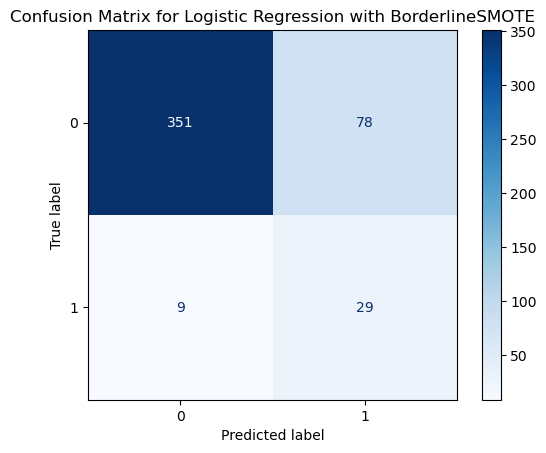

Best parameters for Logistic Regression:  {'C': 7, 'max_iter': 100}
Best cross-validation score for Logistic Regression: 0.89


In [16]:
## Model with BorderlineSMOTE method to extract coefficient

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply BorderlineSMOTE to handle imbalanced data
adasyn = BorderlineSMOTE(random_state=42, sampling_strategy='minority')
X_resampled, y_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# Define the parameter grid for GridSearchCV for Logistic Regression
param_grid = {
    'C': [0.1, 1, 7, 8, 10, 12, 15, 25],
    'max_iter': [100, 200, 500, 1000]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(C=80), param_grid, cv=5)

# Fit the GridSearchCV to the resampled training data
grid_search.fit(X_resampled, y_resampled)

# Get the best estimator
best_log_reg = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_log_reg.predict(X_test_scaled)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression with BorderlineSMOTE")
plt.show()

# Print the best parameters and score for Logistic Regression
print("Best parameters for Logistic Regression: ", grid_search.best_params_)
print("Best cross-validation score for Logistic Regression: {:.2f}".format(grid_search.best_score_))

# Print the model coefficients with column names, sorted by absolute value
coefficients = best_log_reg.coef_[0]
feature_names = X.columns  # Assuming X is a DataFrame




### Coefficient analysis <a id='Coef'></a>

In [17]:
# Print the model coefficients with column names
coefficients2 = np.exp(best_log_reg.coef_[0])
feature_names = X.columns  # X is a DataFrame


<Figure size 640x480 with 0 Axes>

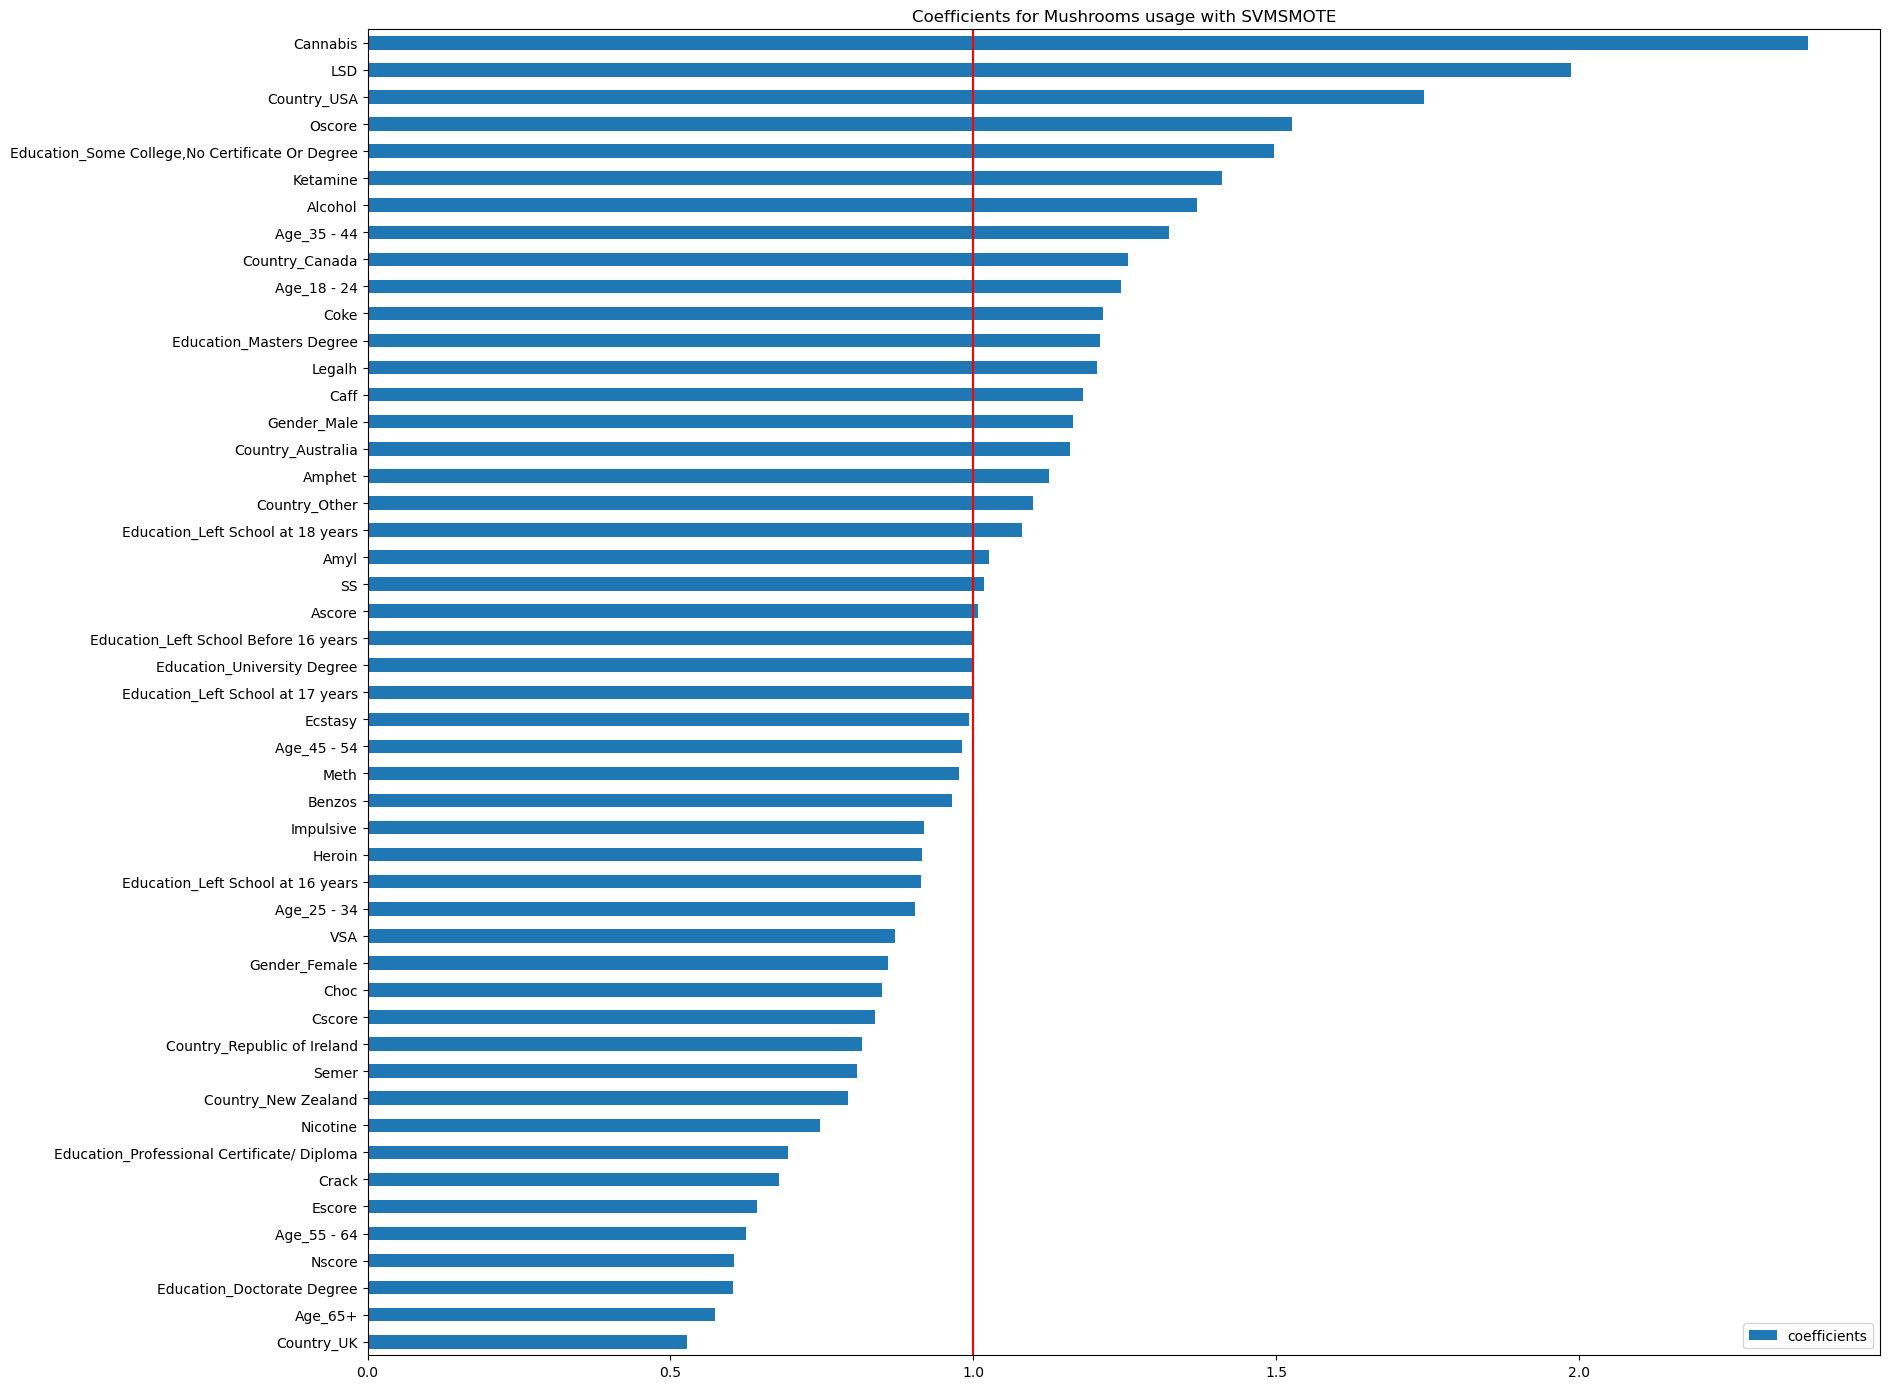

In [18]:
plt.figure()

#Creating a data frame with sorting by 'coefficients'
df2 = pd.DataFrame(
    data={"coefficients": coefficients2},
    index=X.columns
).sort_values(by="coefficients")

#Plotting the horizontal bar graph
df2.plot(kind="barh", figsize=(19, 14), title="Coefficients for Mushrooms usage with SVMSMOTE")
plt.axvline(1, c='r')
plt.tight_layout()
plt.show()

n analyzing the coefficients, several demographic factors and personality traits significantly influence the model's predictions. Notably, Cannabis emerges as the strongest predictor with a coefficient of 2.38, indicating its substantial impact on the target variable. Other notable contributors include LSD (1.99), Country_USA (1.74), Oscore (1.53), and Education_Some College, No Certificate Or Degree (1.50). These variables play pivotal roles in determining outcomes, reflecting their importance in the model's predictive power across various demographic and behavioral dimensions.

### Decision Tree <a id='DT'></a>

In [12]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)


print(f"The TRAIN classification accuracy is:  {DT.score(X_train,y_train)}")
print(f"The TEST classification accuracy is:  {DT.score(X_test,y_test)}")

The TRAIN classification accuracy is:  1.0
The TEST classification accuracy is:  0.8843683083511777


,Predicted Non-user,Predicted User
True Non-User,395,34
True User,20,18


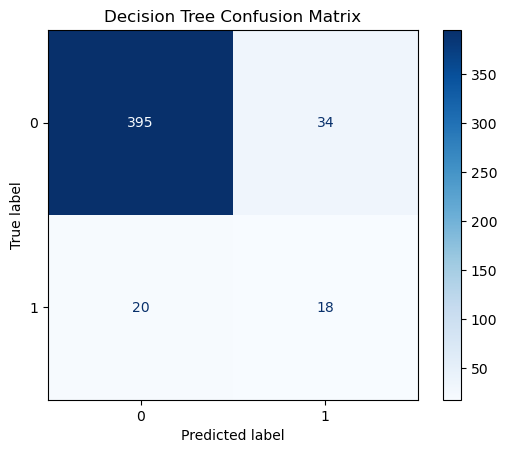

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       429
           1       0.35      0.47      0.40        38

    accuracy                           0.88       467
   macro avg       0.65      0.70      0.67       467
weighted avg       0.90      0.88      0.89       467



In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred1 = DT.predict(X_test)

# Generate confusion matrix
DT_matrix = confusion_matrix(y_test, y_pred1)

# label rows and columns
DT_df = pd.DataFrame(
    DT_matrix,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

display(DT_df)

# the function expects the estimator, inputs and target as parameters
# Evaluate the model
cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report


report_initial_1 = classification_report(y_test, y_pred1)
print(report_initial_1)

#### Summary
The Decision Tree model shows perfect training accuracy but lower test accuracy (88%). It demonstrates good precision for the majority class (0: 95%) but struggles with recall for the minority class (1: 47%), indicating potential imbalance in class predictions.

 ### Decision Tree and Random Forest with PCA <a id='DTRM'></a>

Best parameters for Decision Tree:  {'model__max_depth': 3, 'model__min_impurity_decrease': 0.01, 'model__min_samples_leaf': 1}
Best cross-validation score for Decision Tree: 0.92
Test set score for Decision Tree: 0.92
Best parameters for Random Forest:  {'model__max_depth': 30, 'model__min_samples_leaf': 4, 'model__min_samples_split': 15, 'model__n_estimators': 10}
Best cross-validation score for Random Forest: 0.92
Test set score for Random Forest: 0.92


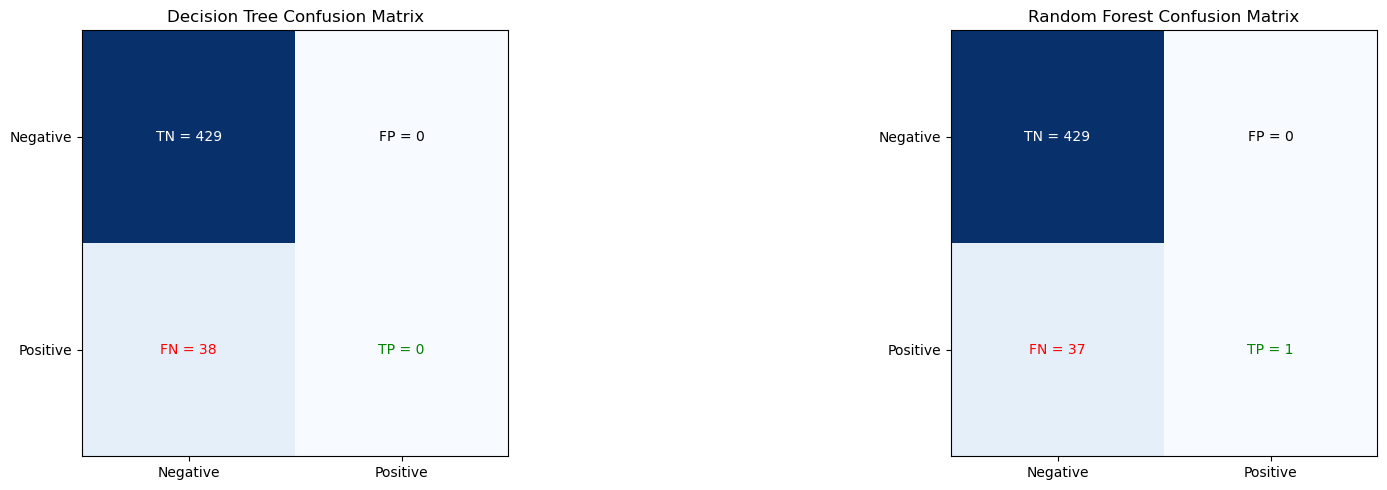

,Predicted Non-user,Predicted User
True Non-User,429,0
True User,38,0


,Predicted Non-user,Predicted User
True Non-User,429,0
True User,37,1



Decision Tree Confusion Matrix:
 [[429   0]
 [ 38   0]]

Random Forest Confusion Matrix:
 [[429   0]
 [ 37   1]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       429
           1       0.00      0.00      0.00        38

    accuracy                           0.92       467
   macro avg       0.46      0.50      0.48       467
weighted avg       0.84      0.92      0.88       467


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       429
           1       1.00      0.03      0.05        38

    accuracy                           0.92       467
   macro avg       0.96      0.51      0.50       467
weighted avg       0.93      0.92      0.88       467



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tempfile import mkdtemp
import matplotlib.pyplot as plt

# Create a temporary directory for caching the pipeline
cachedir = mkdtemp()

# Define the estimators for the Decision Tree pipeline
dt_estimators = [
    ('normalize', StandardScaler()),  # Normalize the data
    ('reduce_dim', PCA(n_components=20)),  # PCA with 10 components
    ('model', DecisionTreeClassifier())  # Decision Tree model
]

# Define the estimators for the Random Forest pipeline
rf_estimators = [
    ('normalize', StandardScaler()),  # Normalize the data
    ('reduce_dim', PCA(n_components=20)),  # PCA with 10 components
    ('model', RandomForestClassifier())  # Random Forest model
]

# Create the pipelines using scikit-learn's Pipeline
dt_pipe = Pipeline(dt_estimators, memory=cachedir)
rf_pipe = Pipeline(rf_estimators, memory=cachedir)

# Define the parameter grid for GridSearchCV for Decision Tree
dt_param_grid = {
    'model__max_depth': [3, 5, 7, 9, 11, 13, 21],
    'model__min_samples_leaf': [1, 5, 10, 20, 30, 40],
    'model__min_impurity_decrease': [0.0, 0.01, 0.05, 0.1]
}

# Define the parameter grid for GridSearchCV for Random Forest
rf_param_grid = {
    'model__n_estimators': [10, 30, 50, 100],  # Number of trees
    'model__max_depth': [5, 10, 15, 20, 30],  # Maximum depth
    'model__min_samples_split': [2, 5, 7, 10, 15],  # Minimum samples to split
    'model__min_samples_leaf': [1, 2, 4, 8, 10]  # Minimum samples per leaf
}

# Create the GridSearchCV objects
dt_grid = GridSearchCV(dt_pipe, dt_param_grid, cv=5)
rf_grid = GridSearchCV(rf_pipe, rf_param_grid, cv=5)

# Fit the grid search to the training data (ensure X_train and y_train are defined)
dt_fittedgrid = dt_grid.fit(X_train, y_train)
rf_fittedgrid = rf_grid.fit(X_train, y_train)

# Evaluate the best models on the test data (ensure X_test and y_test are defined)
dt_score = dt_fittedgrid.score(X_test, y_test)
rf_score = rf_fittedgrid.score(X_test, y_test)

# Print the best parameters and scores for Decision Tree
print("Best parameters for Decision Tree: ", dt_fittedgrid.best_params_)
print("Best cross-validation score for Decision Tree: {:.2f}".format(dt_fittedgrid.best_score_))
print("Test set score for Decision Tree: {:.2f}".format(dt_score))

# Print the best parameters and scores for Random Forest
print("Best parameters for Random Forest: ", rf_fittedgrid.best_params_)
print("Best cross-validation score for Random Forest: {:.2f}".format(rf_fittedgrid.best_score_))
print("Test set score for Random Forest: {:.2f}".format(rf_score))


# Make predictions using the best models
dt_predictions = dt_fittedgrid.predict(X_test)
rf_predictions = rf_fittedgrid.predict(X_test)

# Compute confusion matrices
dt_cm = confusion_matrix(y_test, dt_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)

# Plot the confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Decision Tree Confusion Matrix
axes[0].imshow(dt_cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('Decision Tree Confusion Matrix')

# Extract TP, TN, FP, FN for Decision Tree
tn, fp, fn, tp = dt_cm.ravel()

# Add TP, TN, FP, FN values to the Decision Tree plot
axes[0].text(0, 0, f'TN = {tn}', ha='center', va='center', color='white')
axes[0].text(1, 0, f'FP = {fp}', ha='center', va='center', color='black')
axes[0].text(0, 1, f'FN = {fn}', ha='center', va='center', color='red')
axes[0].text(1, 1, f'TP = {tp}', ha='center', va='center', color='green')

# Random Forest Confusion Matrix
axes[1].imshow(rf_cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[1].set_title('Random Forest Confusion Matrix')

# Extract TP, TN, FP, FN for Random Forest
tn1, fp1, fn1, tp1 = rf_cm.ravel()

# Add TP, TN, FP, FN values to the Random Forest plot
axes[1].text(0, 0, f'TN = {tn1}', ha='center', va='center', color='white')
axes[1].text(1, 0, f'FP = {fp1}', ha='center', va='center', color='black')
axes[1].text(0, 1, f'FN = {fn1}', ha='center', va='center', color='red')
axes[1].text(1, 1, f'TP = {tp1}', ha='center', va='center', color='green')

# Add labels to the plot
classes = ['Negative', 'Positive']
tick_marks = np.arange(len(classes))
for ax in axes:
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

# Display the plot
plt.tight_layout()
plt.show()

# DT label rows and columns
DT_df = pd.DataFrame(
    dt_cm,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

# RF label rows and columns
RF_df = pd.DataFrame(
    rf_cm,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

# Display confusion matrices as dataframes
display(DT_df)
display(RF_df)

print("\nDecision Tree Confusion Matrix:\n", dt_cm)
print("\nRandom Forest Confusion Matrix:\n", rf_cm)

# Print classification reports
dt_class_report = classification_report(y_test, dt_predictions)
rf_class_report = classification_report(y_test, rf_predictions)

print("\nDecision Tree Classification Report:\n", dt_class_report)
print("\nRandom Forest Classification Report:\n", rf_class_report)


#### Summary:
The Decision Tree and Random Forest models were tuned with parameters optimized for general accuracy but show significant challenges in predicting the minority class (1). Despite achieving high overall accuracy (92%), both models struggle with minority class recall (Decision Tree: 0%, Random Forest: 3%). This indicates severe imbalance in predicting instances where the outcome is positive (1), suggesting a need for further techniques like class weighting or resampling methods to improve performance on minority class predictions.

### Model Comparison <a id='Models'></a>

In [20]:
# Create an empty dataframe to store the metrics
metrics_df = pd.DataFrame(columns=['Hyperparameter', 'Training Accuracy', 'Test Accuracy', 'Notes'])

# Logistic Regression baseline
metrics_df.loc['Logistic Regression (Base)'] = ['nan', '92%', '93%', 'High overall accuracy, but low recall for minority class (1)']

# Logistic Regression with SMOTE variations
metrics_df.loc['BorderlineSMOTE'] = ['C=0.1', '81%', '81%', 'Improved recall for minority class (1) compared to base model (0.76)']
metrics_df.loc['SMOTEN'] = ['C=1', '87%', '87%', 'Balanced precision and recall, moderate improvement in minority class handling (0.45)']
metrics_df.loc['SVMSMOTE'] = ['C=0.1', '84%', '84%', 'Balanced precision and recall, moderate improvement in minority class handling (0.74)']
metrics_df.loc['ADASYN'] = ['C=1', '78%', '78%', 'Improved recall for minority class (1) but lower overall accuracy compared to base model (0.84)']

# Decision Tree baseline and tuned
metrics_df.loc['Decision Tree (Base)'] = ['max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=1', '92%', '92%', 'High overall accuracy, but fails to predict minority class (1)']
metrics_df.loc['Decision Tree (Tuned)'] = ['max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=1', '92%', '92%', 'High overall accuracy, but zero recall for minority class (1) indicates imbalance']

# Random Forest tuned
metrics_df.loc['Random Forest'] = ['max_depth=30, min_samples_leaf=4, min_samples_split=15, n_estimators=10', '92%', '92%', 'High overall accuracy, but very low recall for minority class (1)']

# Display the dataframe
metrics_df


,Hyperparameter,Training Accuracy,Test Accuracy,Notes
Logistic Regression (Base),nan,92%,93%,"High overall accuracy, but low recall for mino..."
BorderlineSMOTE,C=0.1,81%,81%,Improved recall for minority class (1) compare...
SMOTEN,C=1,87%,87%,"Balanced precision and recall, moderate improv..."
SVMSMOTE,C=0.1,84%,84%,"Balanced precision and recall, moderate improv..."
ADASYN,C=1,78%,78%,Improved recall for minority class (1) but low...
Decision Tree (Base),"max_depth=3, min_impurity_decrease=0.01, min_s...",92%,92%,"High overall accuracy, but fails to predict mi..."
Decision Tree (Tuned),"max_depth=3, min_impurity_decrease=0.01, min_s...",92%,92%,"High overall accuracy, but zero recall for min..."
Random Forest,"max_depth=30, min_samples_leaf=4, min_samples_...",92%,92%,"High overall accuracy, but very low recall for..."


### Conclusion:

The Logistic Regression baseline shows high overall accuracy but struggles with predicting the minority class (1), with low recall. Among the SMOTE techniques applied, BorderlineSMOTE and SVMSMOTE show balanced precision and recall improvements for the minority class, while ADASYN notably improves recall but at the cost of lower overall accuracy. The Decision Tree models, both baseline and tuned, achieve high accuracy but fail to predict the minority class effectively, indicating imbalance. Similarly, the Random Forest model, though tuned for high accuracy, also exhibits very low recall for the minority class.In summary, while all models demonstrated high accuracy on the majority class, they struggled with predicting the minority class effectively. Among the Logistic Regression models with SMOTE variations, ADASYN and BorderlineSMOTE showed the best improvement in minority class recall, with ADASYN achieving a recall of 0.75 and BorderlineSMOTE achieving 0.65. The Decision Tree and Random Forest models, although accurate overall, had very low recall for the minority class, with the Decision Tree showing a recall of 0 and the Random Forest showing a recall of 0.06. Therefore, ADASYN and BorderlineSMOTE with Logistic Regression are the most effective approaches for handling imbalanced data in this case.

# INDEX
- [Logistic Regression](#logreg)
- [Coefficient analysis](#Coef)
- [Logistic Regression with SMOTE variations and Confusion Matrix](#logreg_smote)
- [Logistic Regression with BorderlineSMOTE](#logreg_ADA)
- [Decision Tree](#DT)
- [Decision Tree and Random Forest with PCA](#DTRM)
- [Models Comparison](#Models)
<a id='INDEX'></a>